# Unidade II - Atividades de Aprendizagem Supervisionada
# Aula 03: Validação e Curvas de Aprendizagem
# Roteiro
 * Curvas de Aprendizagem
 * Atividade de Validação (Hiper-parâmetros)

## 5. Curvas de Aprendizagem

Vamos relembrar os dois conceitos básicos definidos anteriormente. Falamos de **erro de treinamento** (ou erro dentro da amostra), que se refere ao erro medido em todas as amostras de dados observadas no conjunto de treinamento. Também falamos de **erro do teste** ou **erro de generalização**, como o erro esperado em dados novos.

O objetivo da aprendizagem é minimizar o erro de generalização, encontrando um equilíbrio na divisão entre dados de treinamento e de teste.

Vamos tentar entender o comportamento dos algoritmos de aprendizagem de máquina quando a quantidade de dados e a "complexidade" do método mudam. Isso é chamado de **curva da aprendizagem**. Vamos começar primeiro variando a quantidade de dados para uma complexidade fixa.

Vamos criar um classificador e variar o número de exemplos fornecidos a ele para fins de treinamento, depois verificar o comportamento do treinamento e testar a precisão à medida que o número de exemplos aumenta. Neste caso específico, estaremos usando uma árvore de decisão com profundidade máxima fixa.

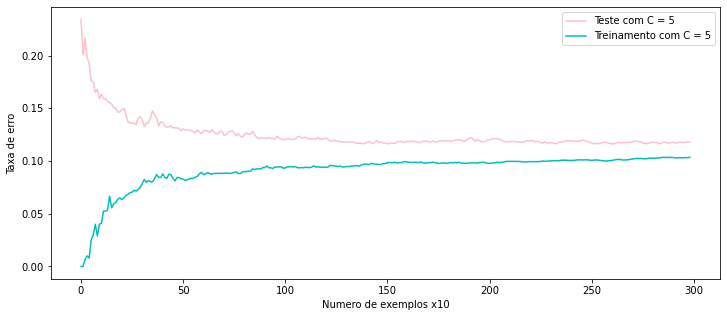

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
from sklearn import metrics
from sklearn import tree

C=5 #profundidade da árvore de decisão
MAXN=1000

yhat_test=np.zeros((10,299,2))
yhat_train=np.zeros((10,299,2))

#Repetir dez vezes para visualizar curvas mais suaves
for i in range(10):
    X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
    X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
    y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
    y = np.concatenate([y,np.ones((MAXN,1))])
    perm = np.random.permutation(y.size)
    X = X[perm,:]
    y = y[perm]

    X_test = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
    X_test = np.concatenate([X_test,[8,5]+1.5*np.random.randn(MAXN,2)])
    y_test = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
    y_test = np.concatenate([y_test,np.ones((MAXN,1))])
    j=0
    for N in range(10,3000,10): #a cada iteração, incrementa o tamanho dos conjuntos de teste e treinamento
        Xr=X[:N,:]
        yr=y[:N]
        
        #Avaliar o modelo
        clf = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C)
        clf.fit(Xr,yr.ravel())
        yhat_test[i,j,0] = 1. - metrics.accuracy_score(clf.predict(X_test), y_test.ravel())
        yhat_train[i,j,0] = 1. - metrics.accuracy_score(clf.predict(Xr), yr.ravel())
        j=j+1

p1,=plt.plot(np.mean(yhat_test[:,:,0].T,axis=1),'pink')
p2,=plt.plot(np.mean(yhat_train[:,:,0].T,axis=1),'c')
fig = plt.gcf()
fig.set_size_inches(12,5)
plt.xlabel('Numero de exemplos x10')
plt.ylabel('Taxa de erro')
plt.legend([p1,p2],["Teste com C = 5","Treinamento com C = 5"])
plt.savefig("plots/learning_curve_1.png",dpi=300, bbox_inches='tight')

Perceba no gráfico acima que conforme o número de amostras de treinamento aumenta, ambos os erros tendem para o mesmo valor. Quando temos poucos dados de treinamento, o erro de treinamento é muito pequeno, mas o erro de teste é muito grande.

Agora vamos repetir o processo com um classificador mais simples.

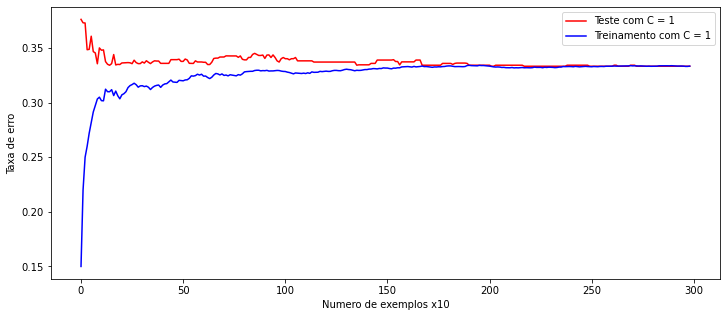

In [2]:
C=1 #profundidade da árvore de decisão
MAXN=1000

#Repetir dez vezes para visualizar curvas mais suaves
for i in range(10):
    X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
    X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
    y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
    y = np.concatenate([y,np.ones((MAXN,1))])
    perm = np.random.permutation(y.size)
    X = X[perm,:]
    y = y[perm]

    X_test = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
    X_test = np.concatenate([X_test,[8,5]+1.5*np.random.randn(MAXN,2)])
    y_test = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
    y_test = np.concatenate([y_test,np.ones((MAXN,1))])
    j=0
    for N in range(10,3000,10):
        Xr=X[:N,:]
        yr=y[:N]
        #Avaliar o modelo
        clf = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C)
        clf.fit(Xr,yr.ravel())
        yhat_test[i,j,1] = 1. - metrics.accuracy_score(clf.predict(X_test), y_test.ravel())
        yhat_train[i,j,1] = 1. - metrics.accuracy_score(clf.predict(Xr), yr.ravel())
        j=j+1

p3,=plt.plot(np.mean(yhat_test[:,:,1].T,axis=1),'r')
p4,=plt.plot(np.mean(yhat_train[:,:,1].T,axis=1),'b')
fig = plt.gcf()
fig.set_size_inches(12,5)
plt.xlabel('Numero de exemplos x10')
plt.ylabel('Taxa de erro')
plt.legend([p3,p4],["Teste com C = 1","Treinamento com C = 1"])
plt.savefig("plots/learning_curve_2.png",dpi=300, bbox_inches='tight')

Vamos juntar ambos os exemplos e analisar a diferença. É possível perceber o seguinte no gráfico a seguir:
+ Com um baixo grau de complexidade, os erros de treinamento e teste convergem mais cedo / com menos dados.
+ Além disso, com um baixo grau de complexidade, o erro de convergência é maior do que com o aumento da complexidade.

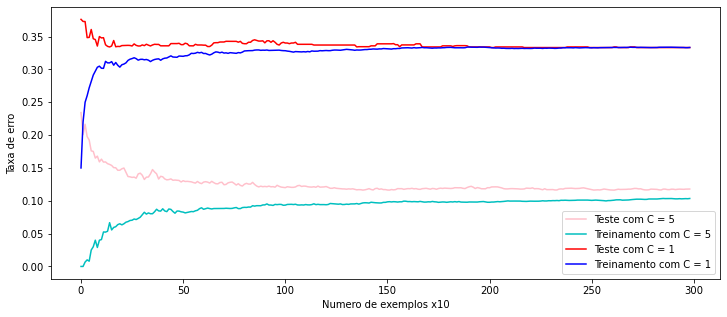

In [3]:
p1,=plt.plot(np.mean(yhat_test[:,:,0].T,axis=1),color='pink')
p2,=plt.plot(np.mean(yhat_train[:,:,0].T,axis=1),'c')
p3,=plt.plot(np.mean(yhat_test[:,:,1].T,axis=1),'r')
p4,=plt.plot(np.mean(yhat_train[:,:,1].T,axis=1),'b')
fig = plt.gcf()
fig.set_size_inches(12,5)
plt.xlabel('Numero de exemplos x10')
plt.ylabel('Taxa de erro')
plt.legend([p1,p2,p3,p4],["Teste com C = 5","Treinamento com C = 5","Teste com C = 1","Treinamento com C = 1"])
fig = plt.gcf()
fig.set_size_inches(12,5)
plt.savefig("plots/learning_curve_3.png",dpi=300, bbox_inches='tight')

Vamos verificar agora o que acontece quando fixamos a quantidade de dados e alteramos a complexidade do classificador.

In [ ]:
!pip install ipywidgets

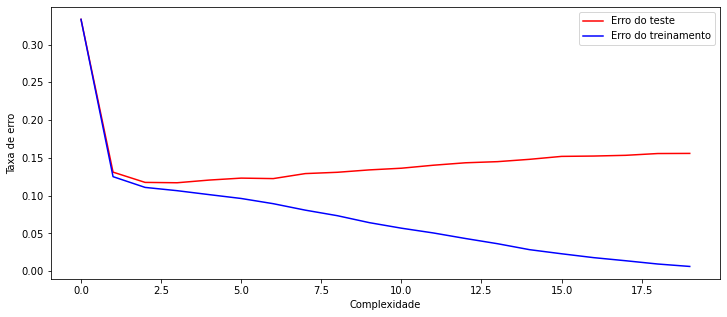

In [4]:
%reset -f
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from sklearn import metrics
from sklearn import tree

MAXC=20
N=1000
NTEST=4000
ITERS=3

yhat_test=np.zeros((ITERS,MAXC,2))
yhat_train=np.zeros((ITERS,MAXC,2))

for i in range(ITERS):
    X = np.concatenate([1.25*np.random.randn(N,2),5+1.5*np.random.randn(N,2)]) 
    X = np.concatenate([X,[8,5]+1.5*np.random.randn(N,2)])
    y = np.concatenate([np.ones((N,1)),-np.ones((N,1))])
    y = np.concatenate([y,np.ones((N,1))])
    perm = np.random.permutation(y.size)
    X = X[perm,:]
    y = y[perm]

    X_test = np.concatenate([1.25*np.random.randn(NTEST,2),5+1.5*np.random.randn(NTEST,2)]) 
    X_test = np.concatenate([X_test,[8,5]+1.5*np.random.randn(NTEST,2)])
    y_test = np.concatenate([np.ones((NTEST,1)),-np.ones((NTEST,1))])
    y_test = np.concatenate([y_test,np.ones((NTEST,1))])

    j=0
    for C in range(1,MAXC+1): #variação da complexidade (profundidade da árvore de decisão)
        #Avaliar o modelo
        clf = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C)
        clf.fit(X,y.ravel())
        yhat_test[i,j,0] = 1. - metrics.accuracy_score(clf.predict(X_test), y_test.ravel())
        yhat_train[i,j,0] = 1. - metrics.accuracy_score(clf.predict(X), y.ravel())
        j=j+1

p1, = plt.plot(np.mean(yhat_test[:,:,0].T,axis=1),'r')
p2, = plt.plot(np.mean(yhat_train[:,:,0].T,axis=1),'b')
fig = plt.gcf()
fig.set_size_inches(12,5)
plt.xlabel('Complexidade')
plt.ylabel('Taxa de erro')
plt.legend([p1, p2], ["Erro do teste", "Erro do treinamento"])
plt.savefig("plots/learning_curve_4.png",dpi=300, bbox_inches='tight')

Observe na figura acima que conforme a complexidade aumenta, o erro de treinamento é reduzido; mas acima de um certo nível de complexidade, o erro de teste passa a aumentar. Este efeito é chamado de **overfitting**. Existem algumas possibilidades para reduzir este problema. Os modelos geralmente são configurados por meio de alguns parâmetros. A seleção da complexidade geralmente é determinada por alguns desses parâmetros. Assim, temos a possibilidade de escolher o modelo ideal para nosso conjunto de dados. Uma boa solução para selecionar o modelo é escolher o valor dos parâmetros que produz o menor erro de teste estimado. Lembre-se de que isso pode ser feito usando validação cruzada.

As estratégias de seleção dos hiperparâmetros e validação cruzada podem ser usadas para auxiliar a selecionar a complexidade de um classificador.

## 6. Validação

O processo de seleção dos melhores parâmetros de um modelo é chamado **Validação**. Isso introduz um novo conjunto em nosso esquema de simulação; agora precisamos dividir os dados que temos em três conjuntos: conjuntos de treinamento, validação e teste. Como vimos, o processo de avaliar o desempenho do classificador estimando o erro de generalização é chamado de teste. E o processo de seleção de um modelo usando a estimativa do erro de generalização é chamado de validação. Há uma diferença sutil, mas crítica entre os dois e temos que estar cientes disso ao lidar com problemas de classificação.

+ Os dados de treinamento são usados para que o algoritmo possa "aprender" os padrões existentes nos exemplos do conjunto de dados.
+ Os dados de teste são usados exclusivamente para avaliar o desempenho no final do processo e nunca serão usados no processo de aprendizagem.
+ Os dados de validação são usados explicitamente para selecionar os parâmetros / modelos com o melhor desempenho de acordo com uma estimativa do erro de generalização. Esta é uma forma de aprendizado.

Acurácia média: [0.82536232 0.8263285  0.83188406 0.83381643 0.83502415 0.83309179
 0.82801932 0.82439614 0.82149758 0.81811594 0.81376812 0.80772947
 0.80289855 0.8        0.79806763 0.78647343 0.77729469 0.7852657 ]
Índice do modelo selecionado: 4
Complexidade: 6


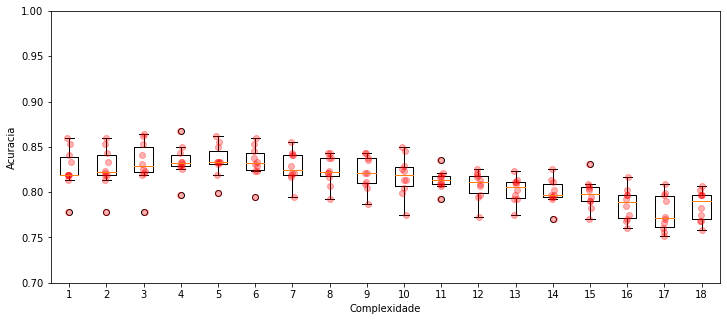

In [5]:
%reset -f
%matplotlib inline
import pickle
ofname = open('files/dataset_small.pkl','rb') 
(X,y) = pickle.load(ofname, encoding="bytes")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import KFold

#Validação cruzada com a técnica K-fold, usando 10 partições
kf=KFold(n_splits=10, shuffle=True, random_state=0)
      
#Variação dos parâmetros: profundidade da árvore de decisão
C=np.arange(2,20,)
acc = np.zeros((10,18))
i=0

#Validação cruzada
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    j=0
    for c in C:
        dt = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=c)
        dt.fit(X_train,y_train)
        yhat = dt.predict(X_val)
        acc[i][j] = metrics.accuracy_score(yhat, y_val)
        j=j+1
    i=i+1
    
plt.boxplot(acc);
for i in range(18):
    xderiv = (i+1)*np.ones(acc[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc[:,i],'ro',alpha=0.3)

print ('Acurácia média: ' + str(np.mean(acc,axis = 0)))
print ('Índice do modelo selecionado: ' + str(np.argmax(np.mean(acc,axis = 0))))
print ('Complexidade: ' + str(C[np.argmax(np.mean(acc,axis = 0))]))
plt.ylim((0.7,1.))
fig = plt.gcf()
fig.set_size_inches(12,5)
plt.xlabel('Complexidade')
plt.ylabel('Acuracia')
plt.savefig("plots/model_selection.png",dpi=300, bbox_inches='tight')

Como podemos ver na figura acima, a melhor acurácia média é obtida pelo quinto modelo, cuja profundidade máxima é 6. Embora possamos verificar que a melhor precisão é com um valor de complexidade de 6, não podemos dizer nada sobre o valor que ela alcançará. Para ter uma estimativa desse valor, precisamos executar o modelo em um novo conjunto de dados diferente, tanto no treinamento quanto no teste.